In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df=pd.read_csv('heart.csv')

In [64]:
df

,age,sex,cp,trestbps,chol,fbs,thalach,target
0,52,1,0,125,212,0,168,0
1,53,1,0,140,203,1,155,0
2,70,1,2,145,174,0,125,0
3,61,1,0,148,203,0,161,0
4,62,0,1,138,294,1,106,0
...,...,...,...,...,...,...,...,...
1355,70,0,0,180,423,1,163,0
1356,46,1,3,194,392,1,172,0
1357,38,1,2,197,491,1,186,0
1358,52,0,1,186,431,1,103,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       1360 non-null   int64
 1   sex       1360 non-null   int64
 2   cp        1360 non-null   int64
 3   trestbps  1360 non-null   int64
 4   chol      1360 non-null   int64
 5   fbs       1360 non-null   int64
 6   thalach   1360 non-null   int64
 7   target    1360 non-null   int64
dtypes: int64(8)
memory usage: 85.1 KB


In [66]:
print(df.shape)

(1360, 8)


In [67]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'target'], dtype='object')

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
thalach     0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,thalach,target
count,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000
mean,54.461029,0.679412,1.038971,132.267647,247.996324,0.198529,149.441176,0.519118
std,9.203605,0.466874,1.064144,18.237388,55.021348,0.399040,23.195292,0.499818
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,132.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,152.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,277.000000,0.000000,167.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,202.000000,1.000000


In [9]:
df['target'].value_counts()

target
1    706
0    654
Name: count, dtype: int64

In [10]:
df['target'].value_counts()*100/df.shape[0]

target
1    51.911765
0    48.088235
Name: count, dtype: float64

# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Disease Status')

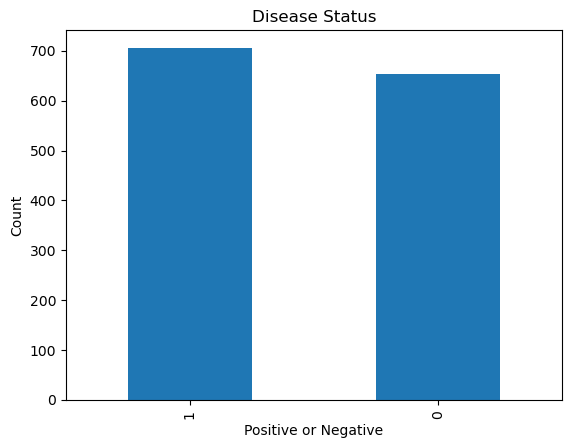

In [13]:
#Bar Chart for Disease status
plt = df.target.value_counts().plot(kind='bar')
plt.set_xlabel('Positive or Negative')
plt.set_ylabel('Count')
plt.set_title('Disease Status')

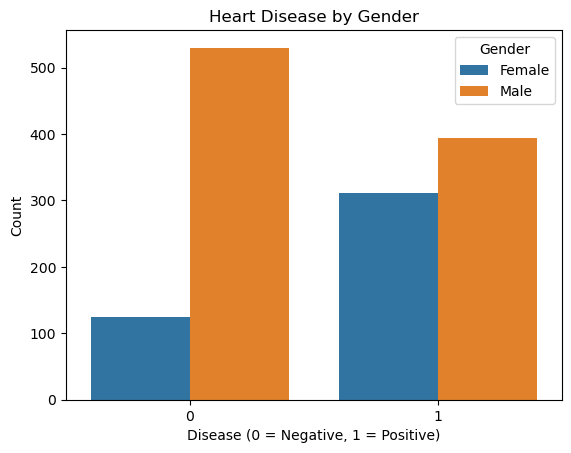

In [17]:
sns.countplot(hue='sex', x='target', data=df)  #Disease count rate Genderwise (1 = Male,  0 = Female)
plt.title('Heart Disease by Gender')
plt.xlabel('Disease (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

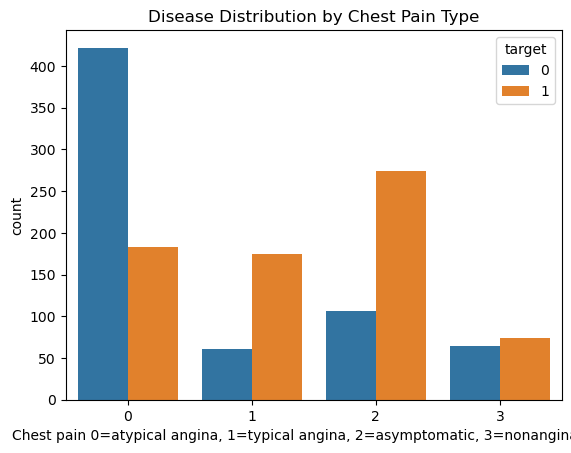

In [18]:
sns.countplot(hue='target' ,x='cp', data=df)
plt.title('Disease Distribution by Chest Pain Type')
plt.xlabel('Chest pain 0=atypical angina, 1=typical angina, 2=asymptomatic, 3=nonanginal pain')
plt.show()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


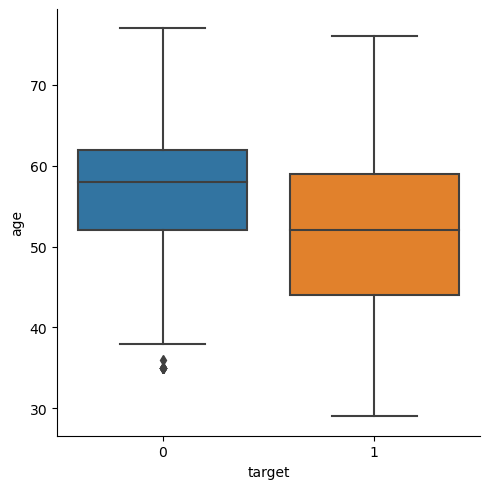

In [19]:
sns.catplot(data=df, x="target", y="age", kind="box")

<Axes: >

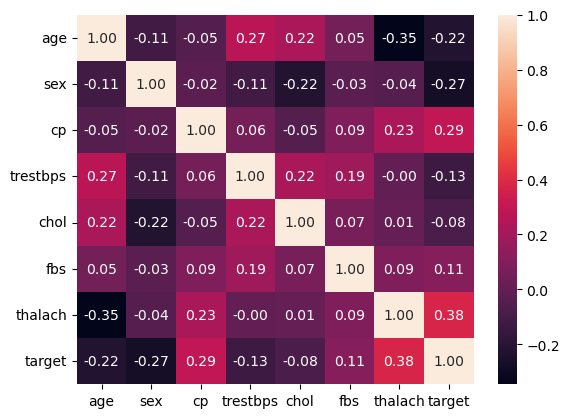

In [22]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

# Splitting data for training

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x = df.drop(columns='target', axis=1)
y = df['target']

In [70]:
print(x)

      age  sex  cp  trestbps  chol  fbs  thalach
0      52    1   0       125   212    0      168
1      53    1   0       140   203    1      155
2      70    1   2       145   174    0      125
3      61    1   0       148   203    0      161
4      62    0   1       138   294    1      106
...   ...  ...  ..       ...   ...  ...      ...
1355   70    0   0       180   423    1      163
1356   46    1   3       194   392    1      172
1357   38    1   2       197   491    1      186
1358   52    0   1       186   431    1      103
1359   31    0   3       167   324    0      146

[1360 rows x 7 columns]


In [71]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1355    0
1356    0
1357    0
1358    0
1359    1
Name: target, Length: 1360, dtype: int64


In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1000)

In [73]:
x_train.shape, x_test.shape

((952, 7), (408, 7))

# Applying ML Models

In [74]:
from sklearn.metrics import accuracy_score #Computes the accuracy of the model
from sklearn.metrics import precision_score #Computes precision
from sklearn.metrics import recall_score #Computes recall (sensitivity or true positive rate)
from sklearn.metrics import f1_score  #combination of precision & recall (Average)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [75]:
def check_accuracy(y_test, pred):
    print("Accuracy  : {:2f}%".format(accuracy_score(y_test,pred)*100))
    print("Precision : {:2f}%".format(precision_score(y_test,pred)*100))
    print("Recall    : {:2f}%".format(recall_score(y_test,pred)*100))
    print("F1        : {:2f}%".format(f1_score(y_test,pred)*100))

# Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)

LogisticRegression()

In [77]:
predictions = model1.predict(x_test)
check_accuracy(y_test, predictions)

Accuracy  : 78.921569%
Precision : 78.995434%
Recall    : 81.220657%
F1        : 80.092593%


# KNN Algorithem

In [78]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)

KNeighborsClassifier()

In [79]:
predictions = model2.predict(x_test)
check_accuracy(y_test, predictions)

Accuracy  : 78.921569%
Precision : 79.262673%
Recall    : 80.751174%
F1        : 80.000000%


# Decision Tree Algorithem

In [80]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)

DecisionTreeClassifier()

In [81]:
predictions = model3.predict(x_test)
check_accuracy(y_test, predictions)

Accuracy  : 94.852941%
Precision : 93.636364%
Recall    : 96.713615%
F1        : 95.150115%


# Random Forest algorithm

In [82]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(x_train, y_train)

RandomForestClassifier()

In [83]:
predictions = model4.predict(x_test)
check_accuracy(y_test, predictions)

Accuracy  : 97.303922%
Precision : 95.909091%
Recall    : 99.061033%
F1        : 97.459584%


# Support Vector Machine

In [84]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

SVC()

In [85]:
predictions = model.predict(x_test)
check_accuracy(y_test, predictions)

Accuracy  : 70.833333%
Precision : 71.559633%
Recall    : 73.239437%
F1        : 72.389791%


# Hyperparameter Tunning

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
# Hyperparameter tuning for Decision Tree
param_grid_dt = {'max_depth': [None,3, 5, 7, 9], 'criterion': ['gini', 'entropy']}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_dt.fit(x_train, y_train)
best_dt = grid_dt.best_estimator_
print("Best hyperparameters for Decision Tree:", grid_dt.best_params_)
predictions_dt = best_dt.predict(x_test)
check_accuracy(y_test, predictions_dt)

Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': None}
Accuracy  : 94.362745%
Precision : 93.577982%
Recall    : 95.774648%
F1        : 94.663573%


In [88]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None,3, 5, 7, 9]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(x_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best hyperparameters for Random Forest:", grid_rf.best_params_)
predictions_rf = best_rf.predict(x_test)
check_accuracy(y_test, predictions_rf)

Best hyperparameters for Random Forest: {'max_depth': None, 'n_estimators': 100}
Accuracy  : 95.833333%
Precision : 94.545455%
Recall    : 97.652582%
F1        : 96.073903%


In [89]:
# Evaluation for Decision Tree
print("Evaluation Report for Decision Tree:")
print(classification_report(y_test, predictions_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_dt))

Evaluation Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       195
           1       0.94      0.96      0.95       213

    accuracy                           0.94       408
   macro avg       0.94      0.94      0.94       408
weighted avg       0.94      0.94      0.94       408

Confusion Matrix:
[[181  14]
 [  9 204]]


In [90]:
# Evaluation for Random Forest
print("Evaluation Report for Random Forest:")
print(classification_report(y_test, predictions_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_rf))

Evaluation Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       195
           1       0.95      0.98      0.96       213

    accuracy                           0.96       408
   macro avg       0.96      0.96      0.96       408
weighted avg       0.96      0.96      0.96       408

Confusion Matrix:
[[183  12]
 [  5 208]]


In [91]:
#Model Comparison & Choose the Best Model
# Choose the evaluation metric for model selection
evaluation_metric = 'accuracy'

# Find the index of the best-performing model based on the chosen metric
best_model_index = accuracy_scores.index(max(accuracy_scores))

# Select the best-performing model
best_model = models[best_model_index]
best_model_name = model_names[best_model_index]

# Evaluate the best model on the test set
best_predictions = best_model.predict(x_test)
best_accuracy = accuracy_score(y_test, best_predictions)
best_precision = precision_score(y_test, best_predictions)
best_recall = recall_score(y_test, best_predictions)
best_f1 = f1_score(y_test, best_predictions)

print("Best Model:", best_model_name)
print("Accuracy:", best_accuracy)
print("Precision:", best_precision)
print("Recall:", best_recall)
print("F1-score:", best_f1)
print("Confusion Matrix:")
print(confusion_matrix(y_test, best_predictions))

Best Model: Random Forest
Accuracy: 0.9754901960784313
Precision: 0.9634703196347032
Recall: 0.9906103286384976
F1-score: 0.9768518518518519
Confusion Matrix:
[[187   8]
 [  2 211]]


In [92]:
input_data = (65,0,1,156,300,1,170)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = best_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [93]:
input_data = (59,1,1,143,329,1,178)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = best_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Creating Pickcle File

In [53]:
import pickle

In [55]:
pickle_file = open('HeartPrediction.pkl','wb')
pickle.dump(best_model,pickle_file)
pickle_file.close()

In [56]:
#Load the pickle file
model_loaded = pickle.load(open('HeartPrediction.pkl','rb')) 

In [57]:
model_loaded

RandomForestClassifier()

In [58]:
input_data = np.array([['65','0','1','156','300','1','170']])
model_loaded.predict(input_data)

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [61]:
input_data = np.array([['59','0','1','143','329','1','178']])
model_loaded.predict(input_data)

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)